In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing data
dfRaw = pd.read_csv('titanic_train.csv')

<Axes: >

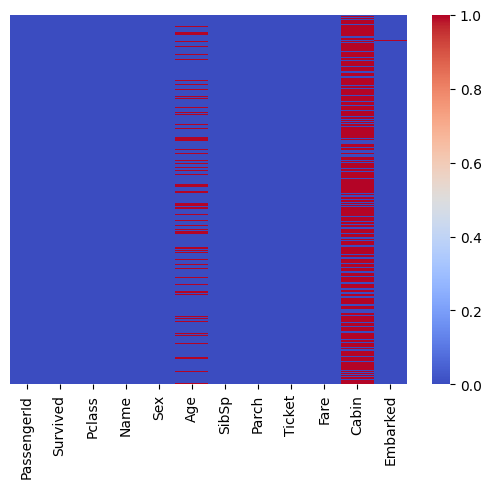

In [3]:
# Checking for null values
sns.heatmap(dfRaw.isnull(), yticklabels=False, cmap='coolwarm')

In [4]:
# Dropping Cabin column because has the majority of it's values null
dfRaw.drop('Cabin', axis=1, inplace=True)

In [5]:
dfRaw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [6]:
# Check for avg age according to each class
dfRaw.groupby(by='Pclass', as_index=False)[['Age']].mean().astype(int)

,Pclass,Age
0,1,38
1,2,29
2,3,25


In [7]:
# Creating a function to fill null values of age according to passenger's class

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return dfRaw[dfRaw['Pclass'] == 1]['Age'].mean()
        elif Pclass == 2:
            return dfRaw[dfRaw['Pclass'] == 2]['Age'].mean()
        else: 
            return dfRaw[dfRaw['Pclass'] == 3]['Age'].mean()
    else: 
        return Age

# Removing extra zeros from age column by converting it to INT

dfRaw['Age'] = dfRaw[['Age', 'Pclass']].apply(impute_age, axis=1).astype(int)

<Axes: >

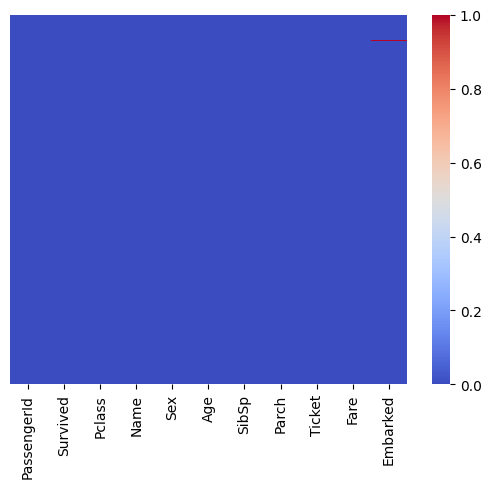

In [8]:
# Checking for any other empty values

sns.heatmap(dfRaw.isnull(), yticklabels=False, cmap="coolwarm")

# Machine Learning Prediction

In [9]:
sex = pd.get_dummies(dfRaw['Sex'],drop_first=True)
embark = pd.get_dummies(dfRaw['Embarked'],drop_first=True)

In [10]:
dfRaw.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [11]:
dfRaw = pd.concat([dfRaw,sex,embark],axis=1)

In [12]:
dfRaw.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22,1,0,7.2500,1,0,1
1,2,1,1,38,1,0,71.2833,0,0,0
2,3,1,3,26,0,0,7.9250,0,0,1
3,4,1,1,35,1,0,53.1000,0,0,1
4,5,0,3,35,0,0,8.0500,1,0,1


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(dfRaw.drop('Survived',axis=1), 
                                                    dfRaw['Survived'], test_size=0.40, random_state=None)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [17]:
predictions = logmodel.predict(X_test)

In [18]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       213
           1       0.80      0.69      0.74       144

    accuracy                           0.81       357
   macro avg       0.81      0.79      0.79       357
weighted avg       0.81      0.81      0.80       357

